In [1]:
import requests
import utils

url = 'https://adventofcode.com/2021/leaderboard/private/view/1075819.json'
request = requests.get(url, cookies=utils.get_cookies())
data = request.json()

In [2]:
import pandas as pd

df = pd.json_normalize(data['members'].values())
df = df[['name', 'local_score', 'stars'] + list(sorted(df.columns[6:], key=lambda x: float(x[21:-12])))]
df.columns = ['name', 'score' ,'stars'] + [col[21:-12] for col in df.columns[3:]]

local_time = + 1 # CEST

df['accumulated_time'] = pd.Timedelta(0)
for i in range(3, df.shape[1]-1):
    df[df.columns[i]] = pd.to_datetime(df[df.columns[i]], unit='s') + \
        pd.Timedelta(local_time, unit='H')
    if i%2 == 0:
        df[df.columns[i]] -= df[df.columns[i-1]]
        df['accumulated_time'] += df[df.columns[i]]

df = df.sort_values('score', ascending=False)

def style_data(x):
    if isinstance(x, pd.Timestamp):
        return x.strftime('%H:%M:%S')
    if isinstance(x, pd.Timedelta):
        return str(x)[-8:]
    return x

df.style.format(style_data).hide_index()

name,score,stars,1.1,1.2,2.1,2.2,3.1,3.2,accumulated_time
Arnau Q,74,6,08:56:48,00:02:38,08:17:02,00:03:07,09:44:49,00:30:14,00:35:59
Andreu Vall Hernàndez,66,6,08:24:30,00:07:44,09:11:17,00:02:02,12:33:15,00:27:39,00:37:25
David Rial Figols,66,6,10:36:31,00:08:55,09:31:31,00:02:43,07:09:12,00:36:45,00:48:23
albertsalles4,66,6,10:22:07,00:08:49,09:21:50,00:02:31,10:10:11,00:15:24,00:26:44
Antonio Tigri,51,6,15:22:36,00:12:46,10:56:21,00:03:52,11:37:32,00:34:25,00:51:03
sarabase,47,6,18:32:58,00:18:29,12:06:40,00:03:32,11:23:58,00:55:36,01:17:37
Arnau Martínez Tomàs,44,6,23:53:14,00:45:12,10:23:49,00:25:47,12:59:36,00:30:52,01:41:51
EstherRH00,42,6,13:11:40,00:42:39,21:05:03,00:03:25,13:39:55,00:23:11,01:09:15
Joan Orteu,0,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Oriol Saguillo Gonzalez,0,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT


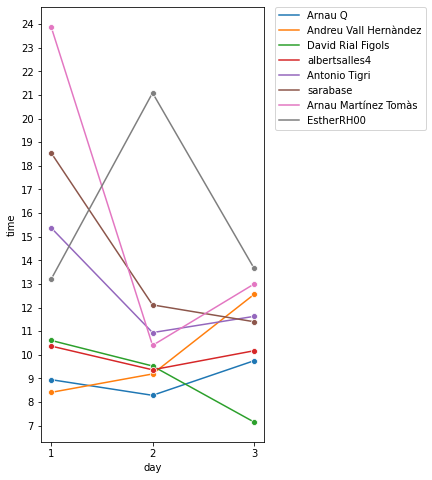

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

format = '%H:%M:%S'

times_data = []
for idx, row in df.iterrows():
    for day in [1, 2, 3]:
        date = row[f'{day}.1']
        if not pd.isnull(date):
            time = date.hour + date.minute/60 + date.second/3600
            times_data.append({'name': row['name'], 'day': day, 'time': time})

times = pd.DataFrame(times_data)

plt.figure(figsize=(4,8))

ax = sns.lineplot(data=times, x='day', y='time', hue='name', marker='o')

ax.set_yticks(range(7, 25))
ax.set_xticks(range(1, 4))

_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)